# Getting used to working with the AstroPy lib, and spectra files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob

How to get data out of the fits

In [440]:
fits.getdata("../../Data/ExampleFitsData/Spectra/spec-0266-51602-0001.fits", ext=1)

FITS_rec([(54.982758, 3.5805, 0.02910403, 0, 0, 1.2523572 , 6.288123 , 42.33791),
          (62.604507, 3.5806, 0.02681083, 0, 0, 1.2520878 , 6.0879006, 45.88399),
          (59.565502, 3.5807, 0.02775592, 0, 0, 1.2518274 , 5.8591967, 46.86324),
          ...,
          (92.90242 , 3.9637, 0.13141102, 0, 0, 0.7960144 , 3.677507 , 93.62696),
          (95.50774 , 3.9638, 0.1298858 , 0, 0, 0.7958315 , 3.860732 , 93.63027),
          (91.590416, 3.9639, 0.136592  , 0, 0, 0.79564834, 4.135065 , 93.63358)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Cool method to recreate the pictures found on the SLOAN website

C:\Users\stone\Miniconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


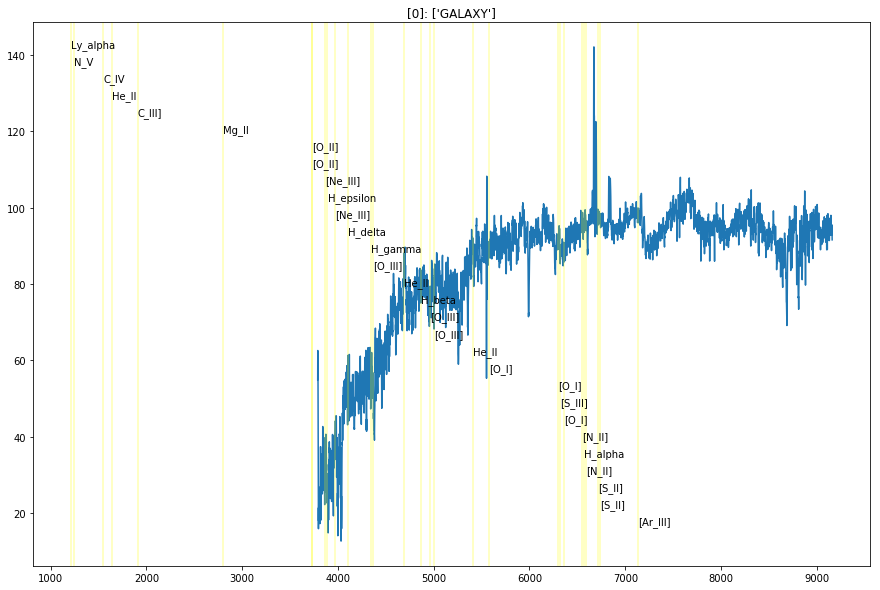

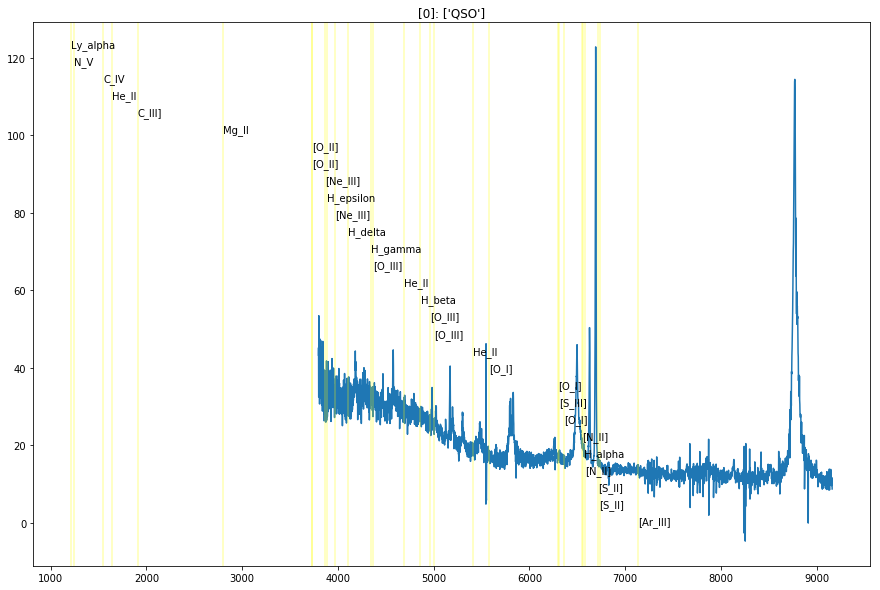

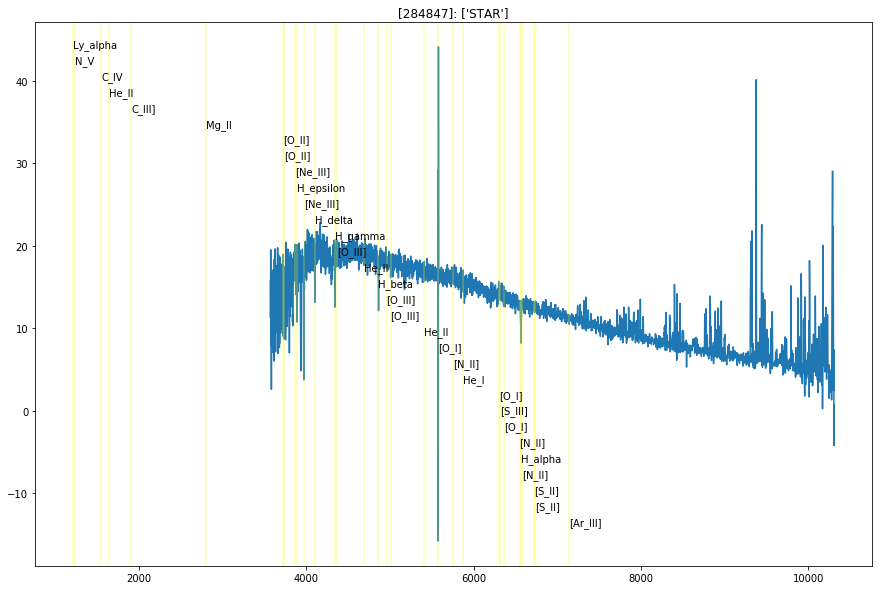

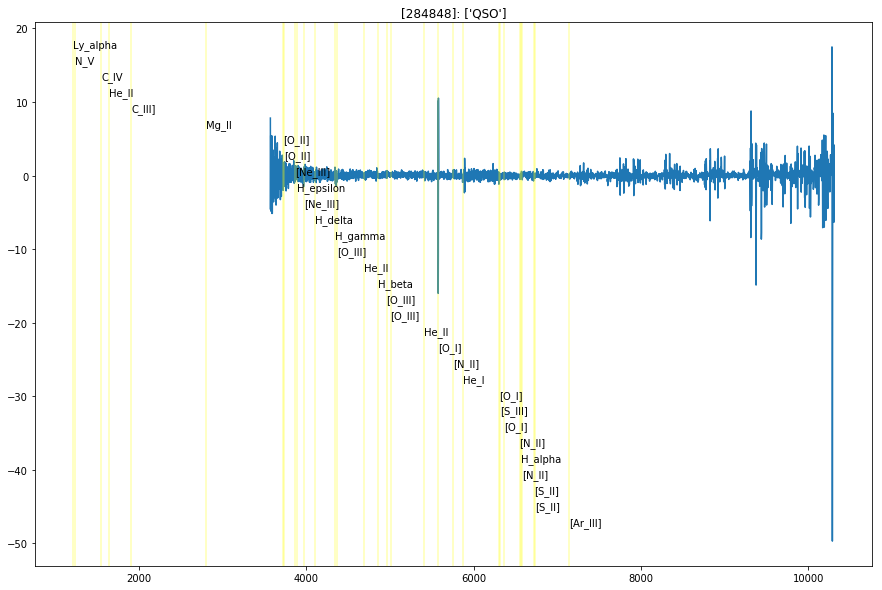

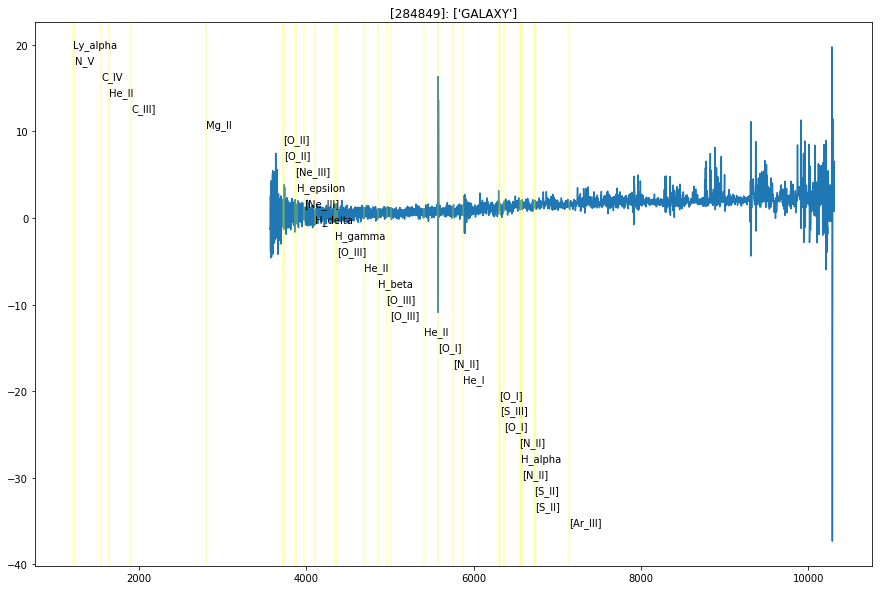

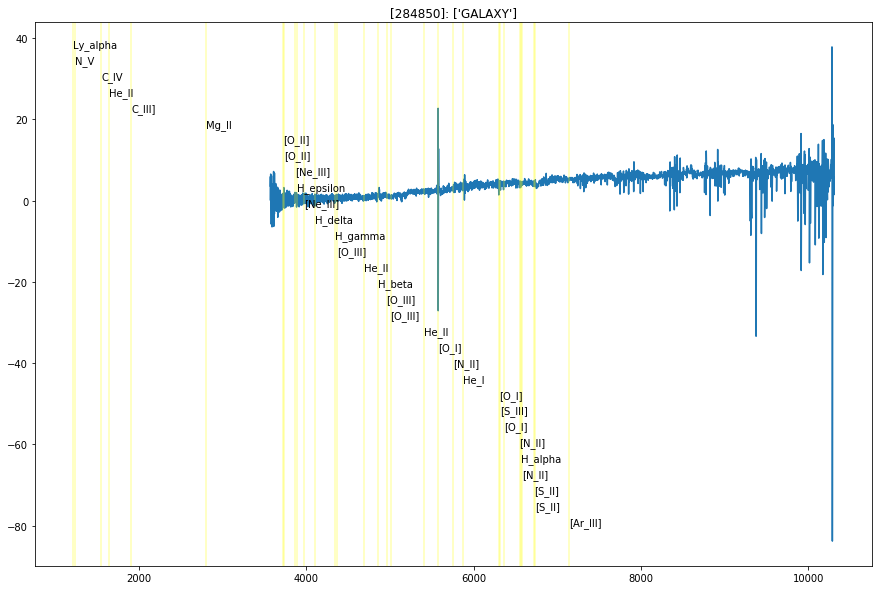

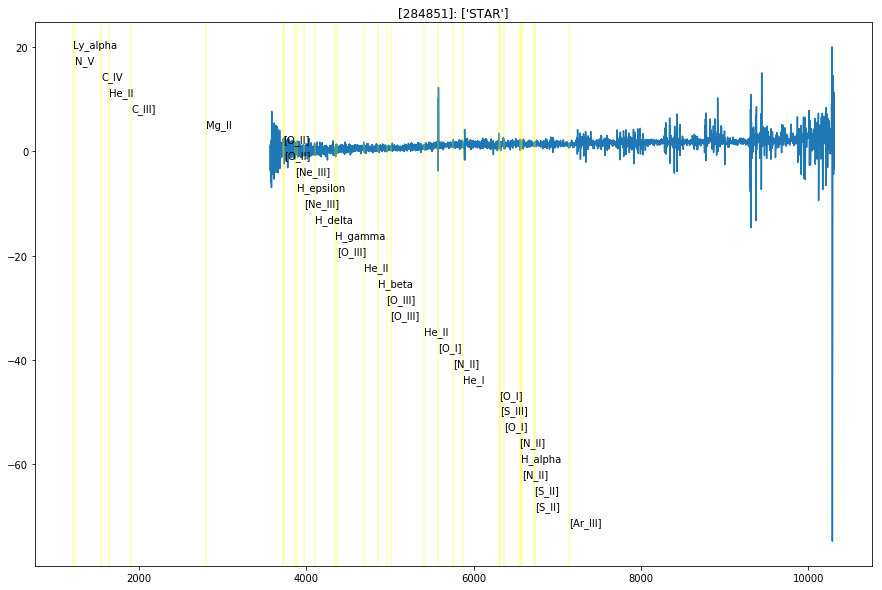

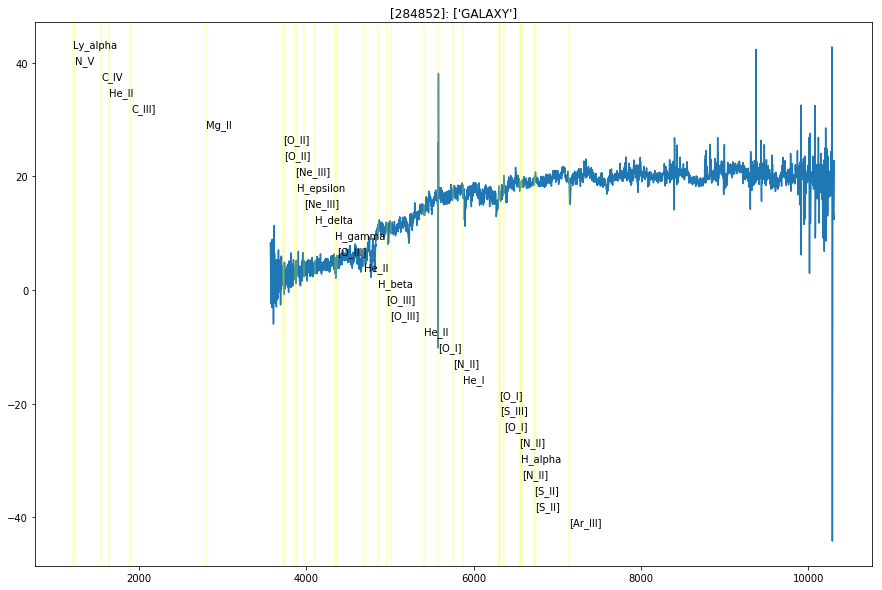

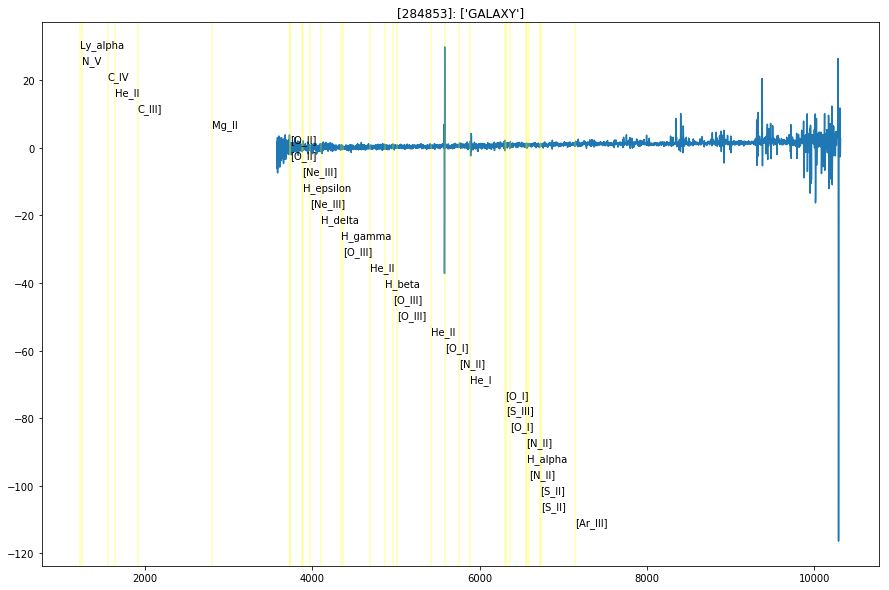

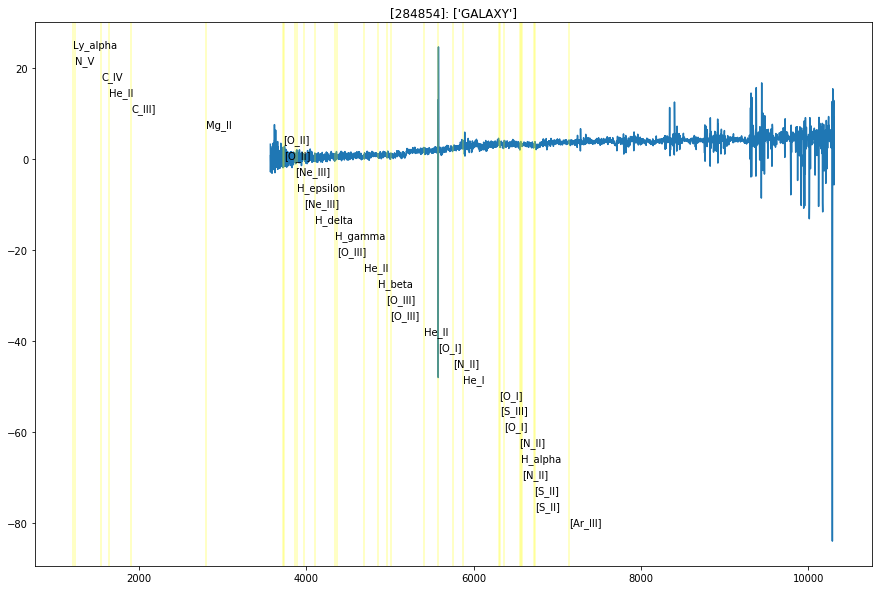

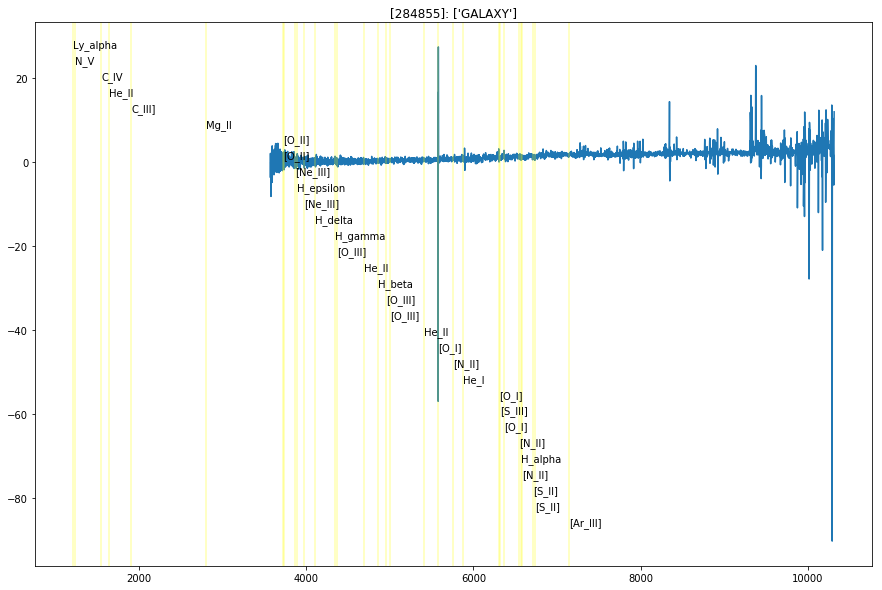

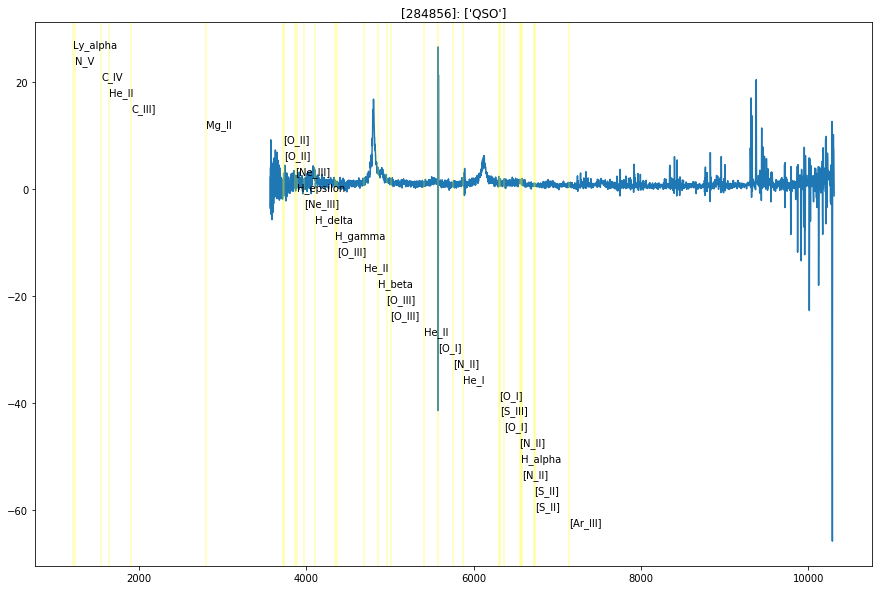

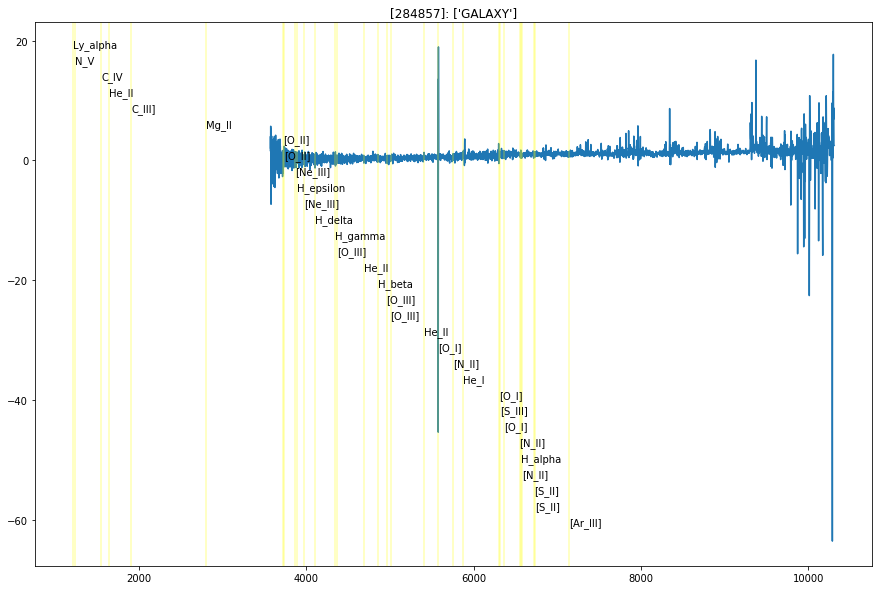

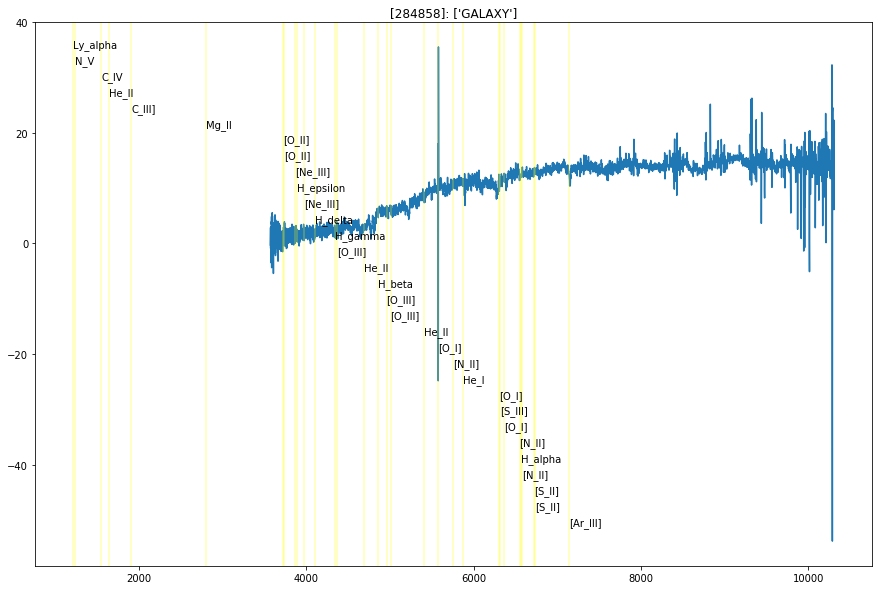

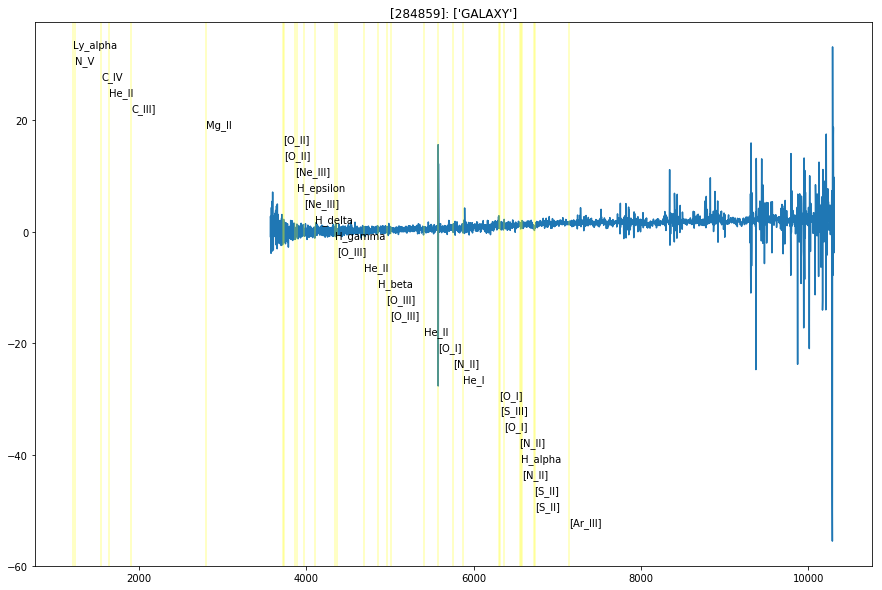

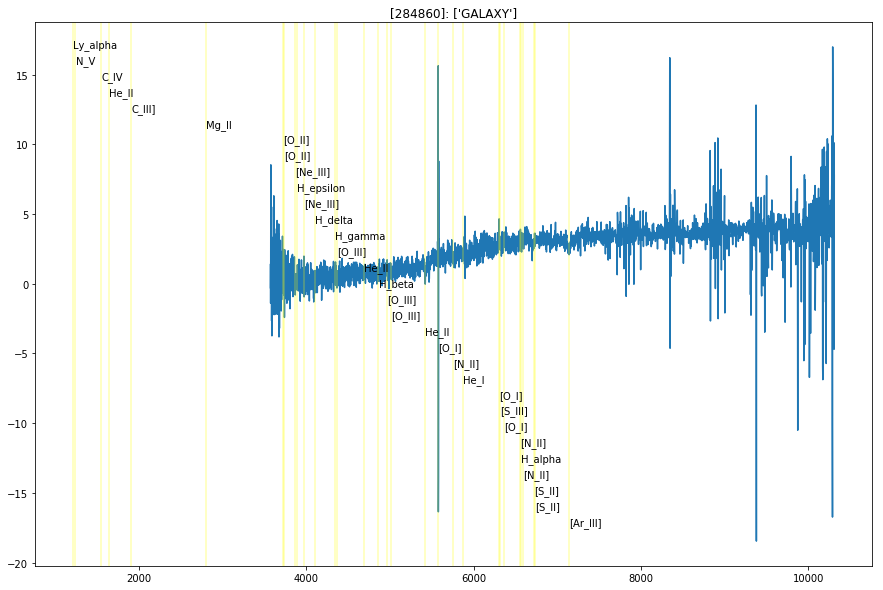

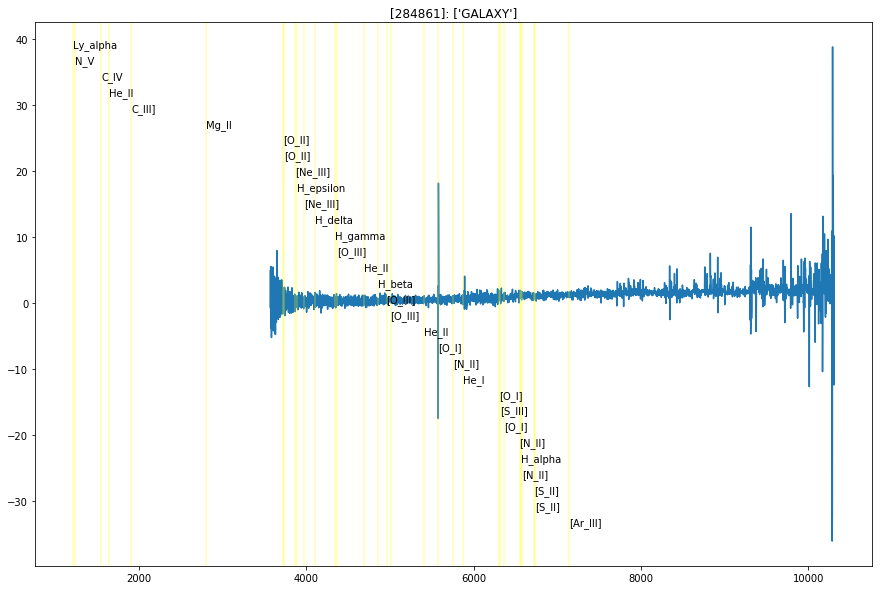

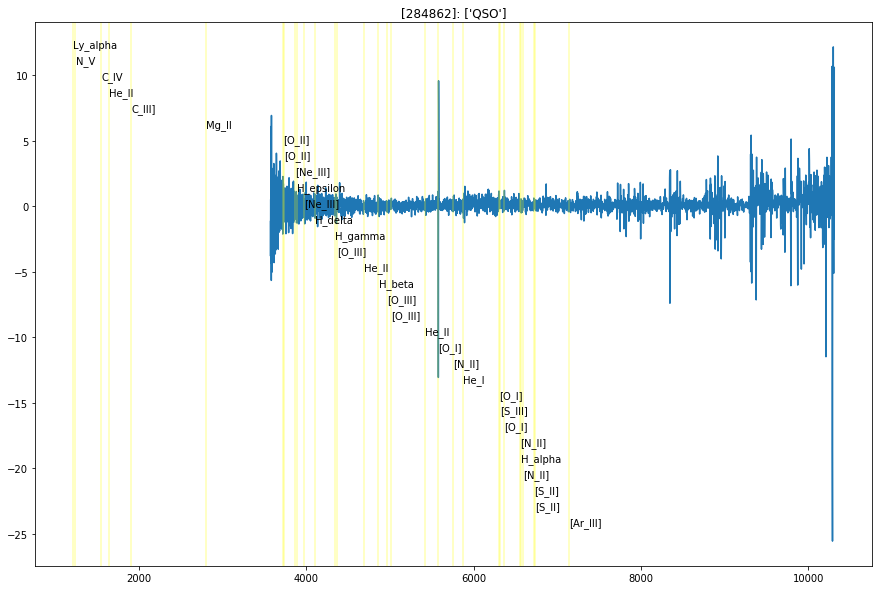

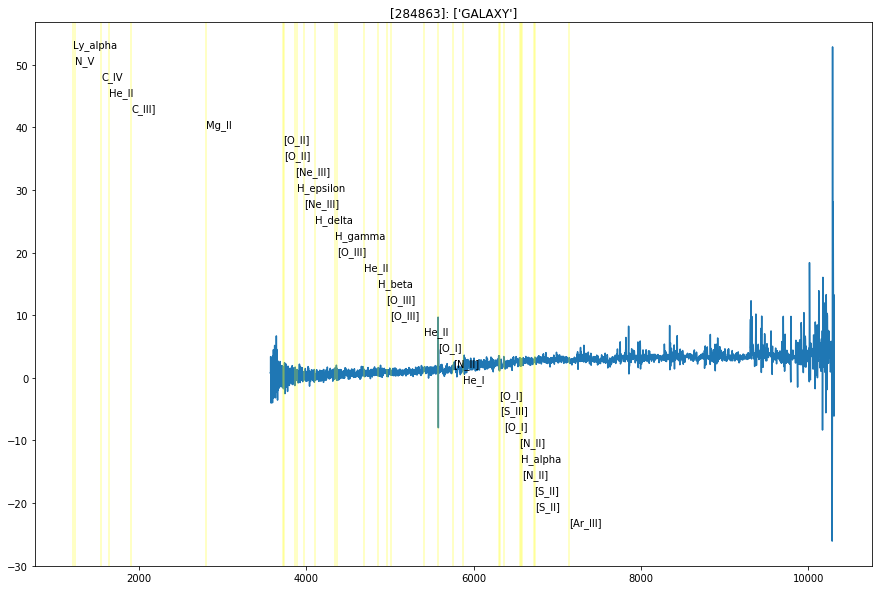

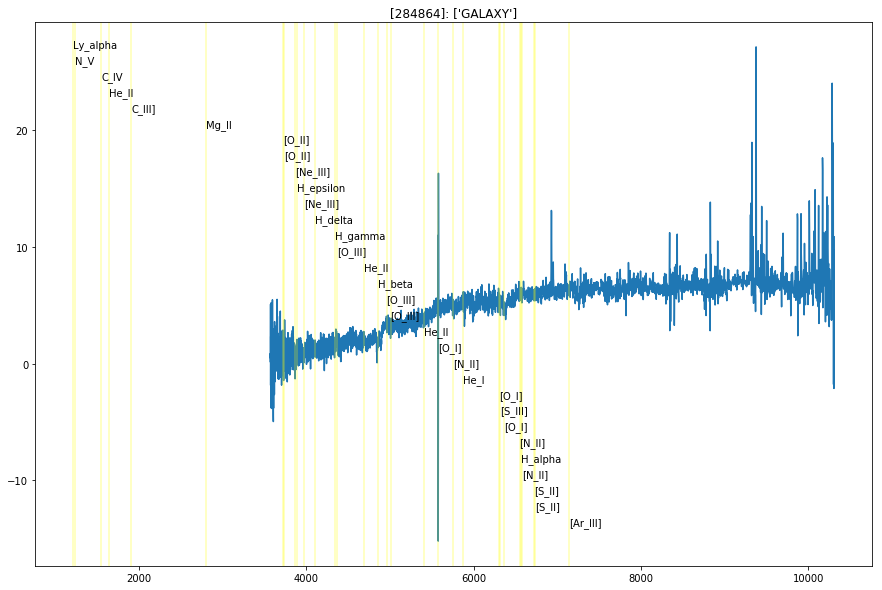

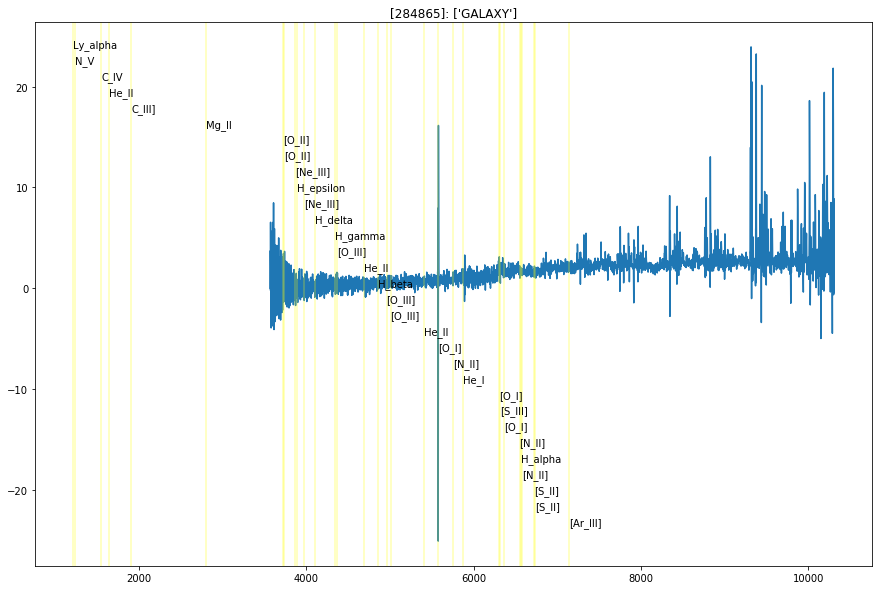

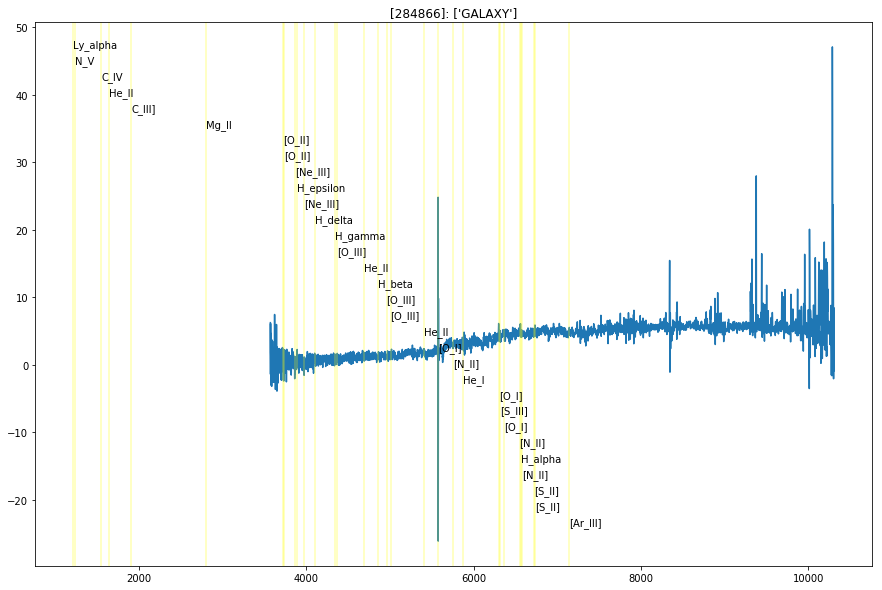

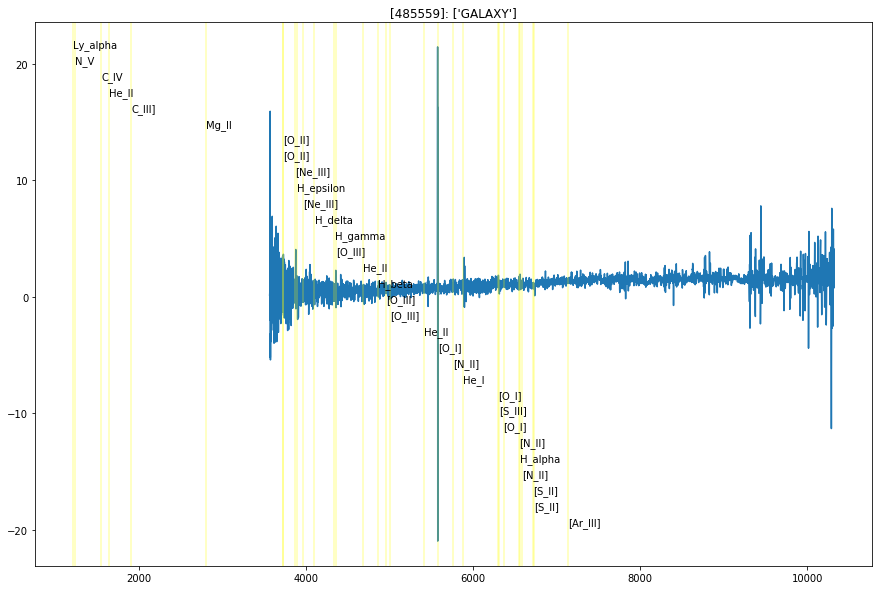

In [436]:
# Go through each file.
spec_files = glob("../../Data/ExampleFitsData/Spectra/*.fits")
for f in spec_files:
    spectra = fits.open(f)
    
    # How to calculate where to start the x-variable on.
    naxis = spectra[1].header['NAXIS2']
    coeff0, coeff1 = spectra[0].header['COEFF0'], spectra[0].header['COEFF1']
    names, values = spectra[3].data['LINENAME'], spectra[3].data['LINEWAVE']
    flux_data = spectra[1].data['flux']

    # Calculating the x-range.
    wave_range = 10**(coeff0 + (coeff1*np.arange(naxis)))

    # Plot the flux.
    plt.figure(figsize=(15,10))
    plt.title(str(spectra[2].data['BOSS_SPECOBJ_ID']) + ": " +  str(spectra[2].data['CLASS']))
    plt.plot(wave_range, flux_data)

    # Plotting the emission lines.
    dec_value = (np.max(flux_data) - np.min(flux_data))/len(names)
    for ix, (name, value) in enumerate(zip(names, values)):
        what = plt.axvline(value, c='yellow', alpha=.3)
        plt.text(value+1, np.max(flux_data) - (ix*dec_value), name.split(' ')[0])